# IRIS Dataset: Decision Tree & Ensemble Assignment

IE7860

Priyanka Patil

## Dataset Description

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

Dataset can be downloaded from:
https://archive.ics.uci.edu/ml/datasets/iris

### Import required libraries

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import shap
warnings.filterwarnings("ignore")

## Load, review and preprocess dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()

# Create a list of feature names
feat_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

# Create X from the features
X = iris.data

# Create y from output
y = iris.target

In [3]:
# View the features
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
# View the target data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Model Building and Evaluation

In [5]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##  Logistic Regression, Perceptron, KNN, Single Decision Tree, XGBoost Model, Bagging Model, Random Forest Model, Gradient Boosting, SVM

In [6]:
models = {'Logistic Regression': LogisticRegression(), 'Perceptron':Perceptron(alpha=0.001),  'K Neighbours':KNeighborsClassifier(n_neighbors=1), 'SVM':SVC(),
         'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'Bagging Classifier': BaggingClassifier(),'xgb': XGBClassifier()}

In [7]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("#########################################################")
    print()
    print("Model:", model_name)
    print("Training score: "+"{:.2f}".format(model.score(X_train, y_train)))
    print("Testing score: "+"{:.2f}".format(model.score(X_test, y_test)))
    print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
    print()
    print("Classification Report:\n", classification_report(y_pred, y_test))
    print()
    

#########################################################

Model: Logistic Regression
Training score: 0.97
Testing score: 1.00
Confusion Matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


#########################################################

Model: Perceptron
Training score: 0.95
Testing score: 1.00
Confusion Matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00   

## Model Output Comparison:

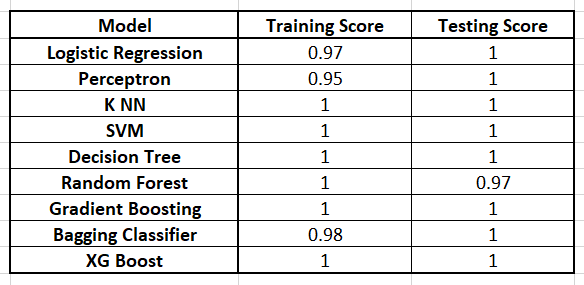

From the above tabular column, we see that all the models are performing well. 

# Model Output explaination

## Feature importance using Random Forest and XGBoost models

### XGBoost

In [8]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, xgb.feature_importances_):
    print(feature)

('Sepal Length', 0.022800513)
('Sepal Width', 0.029785687)
('Petal Length', 0.53053313)
('Petal Width', 0.41688073)


### Random Forest

In [9]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Sepal Length', 0.10622078159504643)
('Sepal Width', 0.027403516962454574)
('Petal Length', 0.42914688142730867)
('Petal Width', 0.4372288200151903)


In [10]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [11]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Petal Length
Petal Width


In [12]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [13]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [14]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

1.0

In [15]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

1.0

As can be seen by the accuracy scores, our original model which contained all four features is 100% accurate while the our ‘limited’ model which contained only two features is also 100% accurate. Thus, there is no significant difference observed in the accuracy for this small dataset however, in big datasets this will help imporve our accuracy.

## Feature importance using any Explainable AI Package (e.g., LIME or SHAP)

In [16]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

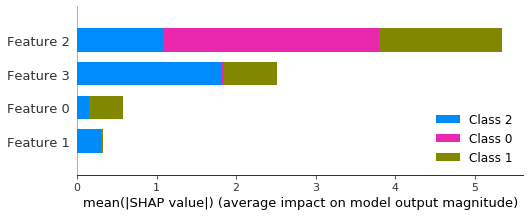

In [17]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Conclusion

From the above Shap plot, We see that Petal Length & Petal width are the most important features in determining our Model performance. Sepal Length & Sepal width are also helpful to a smaller extent. However, Since this is the small dataset reducing the number of features will not make much difference in the model performance.